In [77]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import json

direc = 'D:/Bas/Github pages/data/'
#directory in which data_hvh.json etc is kept. Make sure not to omit the / at the end

In [215]:
data_set = "gen" # choose between gen, time or learn

with open(direc + 'games-learn.json') as data_file: 
    data = json.load(data_file)

In [216]:
#input: string representations of the black & white pieces
#creates figure with those pieces on a 4-by-9 board
#optional input: move, represented index of the tile & player color
#if optional input is given, adds this piece to the board

def display_board(bp,wp,move = 99,color = 0):
    fig = plt.figure()
    ax = fig.add_subplot(111,aspect='equal')
    rec = patches.Rectangle((-0.5,-0.5),9,4,color="gray",fill=True,zorder=1)
    ax.add_patch(rec)
    ax.vlines(np.arange(-0.5,9.5,1),-0.5,3.5)
    ax.hlines(np.arange(-0.5,4.5,1),-0.5,8.5)
    for i in range(36):
        if(bp[i]=='1'):
            circ = patches.Circle((i%9,i//9),0.33,color="black",fill=True)
            circ = ax.add_patch(circ)
        if(wp[i]=='1'):
            circ = patches.Circle((i%9,i//9),0.33,color="white",fill=True)
            circ = ax.add_patch(circ)
    if(move!=99):
        circ = patches.Circle((move%9,move//9),0.33,color=("black" if color==0 else "white"),fill=True)
        circ = ax.add_patch(circ)
    ax.axis('off')
    plt.show()

#Converts player ID to name
#in the learning experiment, player name encodes both participant and session number
#for example, number 70 is participant 10, session 3
#in the learning experiment, computer name encode both opponent and time constraint
#for example, number 70 is computer 10, time constraint of 20s
#Note that all data is anonymized
def parse_player_name(n):
    if n<1000:
        if data_set=="learn":
            return "participant " + str(n%30)
        else:
            return "participant " + str(n)
    else:
        if data_set=="time":
            return "computer " + str(n%30-1000)
        else:
            return "computer " + str(n-1000)
    
#Creates a series of figures, one for each move in the game
#Note that participants and games are indexed from 0
def display_game(participant,game):
    if (participant>=0 and participant< len(data) and 
        game>=0 and game<len(data[participant]) and 
        len(data[participant][game])>=2):        
        print("Black: " + parse_player_name(data[participant][game][0][4]) +
              ", white: " + parse_player_name(data[participant][game][1][4]))
        for dd in data[participant][game]:
            display_board(dd[1],dd[2])
        dd = data[participant][game][-1]
        display_board(dd[1],dd[2],dd[3],dd[0])
    else: 
        print("Invalid game: index out of bounds")

Black: participant 5, white: computer 2


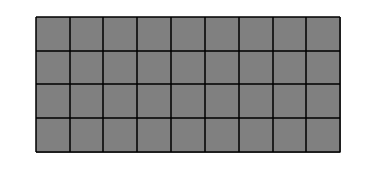

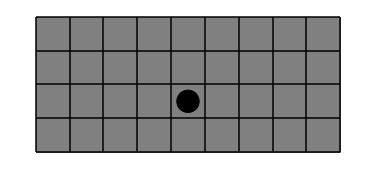

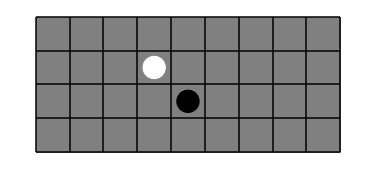

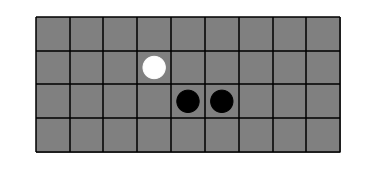

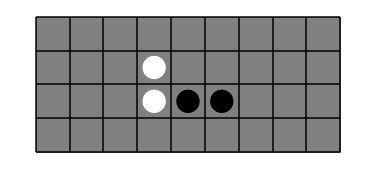

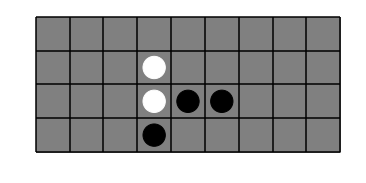

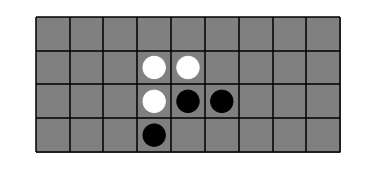

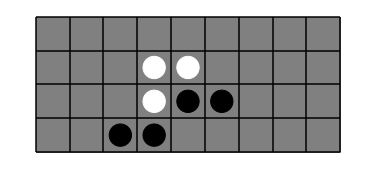

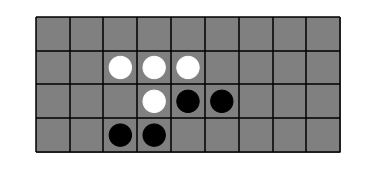

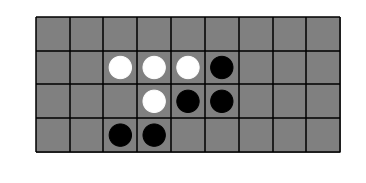

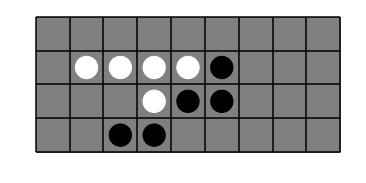

In [217]:
display_game(5,13)